# CIDS Carpentries Workshop - Day 1 - Part 2
This lesson is adapted from the Data Carpentries [Data Analysis and Visualization in Python for Ecologists](https://datacarpentry.org/python-ecology-lesson/index.html) lesson.

---
## How to use a Jupyter Notebook
Online Resources:
- https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/index.html
- https://code.visualstudio.com/docs/datascience/jupyter-notebooks 

Useful Tips:
- The notebook autosaves
- You run a cell with **shift + enter** or using the run button in the tool bar
- If you run a cell with **option + enter** it will also create a new cell below
- See *Help > Keyboard Shortcuts* or the *Cheatsheet* for more info
- The notebook has different type of cells (Code and Markdown are most commonly used): 
    - **Code** cells expect code for the Kernel you have chosen, syntax highlighting is available, comments in the code are specified with # -> code after this will not be executed
    - **Markdown** cells allow you to right report style text, using markdown for formatting the style (e.g. Headers, bold face etc)
---

## ❓Questions and Objectives for this Notebook
What should you be able to answer by the end of this notebook?
### Questions

- How can I import data in Python?
- What is Pandas?
- Why should I use Pandas to work with data?

### Objectives
- Navigate the workshop directory and download a dataset.
- Explain what a library is and what libraries are used for.
- Describe what the Python Data Analysis Library (Pandas) is.
- Load the Python Data Analysis Library (Pandas).
- Use read_csv to read tabular data into Python.
- Describe what a DataFrame is in Python.
- Access and summarize data stored in a DataFrame.
- Define indexing as it relates to data structures.
- Perform basic mathematical operations and summary statistics on data in a Pandas DataFrame.
- Create simple plots.
---

## Starting with Data

### Working with Pandas DataFrames in Python
We can automate the process of performing data manipulations in Python. It's efficient to spend time building the code to perform these tasks because once it's built, we can use it over and over on different datasets that use a similar format. This makes our methods easily reproducible. We can also easily share our code with colleagues and they can replicate the same analysis.

#### Starting in the same spot
To help the lesson run smoothly, let's ensure that everyone is in the same directory. This should help us avoid path and filename issues. At this time, please navigate to the workshop directory. If you are working in Jupyter Notebook, be sure that you start your notebook in the workshop directory.

A quick aside is that there are Python libraries like [OS
Library](https://docs.python.org/3/library/os.html) and [pathlib](https://docs.python.org/3/library/pathlib.html) that can work with our
directory structure, however, that is not our focus today.

#### Our Data
For this lesson, we will be using the Portal Teaching data, a subset of the data
from Ernst et al
[Long-term monitoring and experimental manipulation of a Chihuahuan Desert ecosystem near Portal, Arizona, USA](http://www.esapubs.org/archive/ecol/E090/118/default.htm)

We will be using files from the [Portal Project Teaching Database](https://figshare.com/articles/Portal_Project_Teaching_Database/1314459).
This section will use the `surveys.csv` file which can be found in ../data/.

We are studying the species and weight of animals caught in plots in our study
area. The dataset is stored as a `.csv` file: each row holds information for a
single animal, and the columns represent:

| Column           | Description                        |
|------------------|------------------------------------|
| record_id        | Unique id for the observation      |
| month            | month of observation               |
| day              | day of observation                 |
| year             | year of observation                |
| plot             | ID of a particular plot            |
| species          | 2-letter code                      |
| sex              | sex of animal ("M", "F")           |
| wgt              | weight of the animal in grams      |


The first few rows of our first file look like this:

```
record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
1,7,16,1977,2,NL,M,32,
2,7,16,1977,3,NL,M,33,
3,7,16,1977,2,DM,F,37,
4,7,16,1977,7,DM,M,36,
```

#### About Libraries
![](../pictures/package.png)

A library in Python contains a set of tools (called functions) that perform
tasks on our data. Importing a library is like getting a piece of lab equipment
out of a storage locker and setting it up on the bench for use in a project.
Once a library is set up, it can be used or called to perform many tasks.

You only need to load a library once during your session. You can load the library when needed
or you can load all necessary libraries at the beginning of your script. 
This is good practice, especially for the readability of your code.

#### Pandas in Python
One of the best options for working with tabular data in Python is to use the
[Python Data Analysis Library](http://pandas.pydata.org/) (a.k.a. Pandas). The
Pandas library provides data structures, produces high quality plots with
[matplotlib](http://matplotlib.org/) and integrates nicely with other libraries
that use [NumPy](http://www.numpy.org/) (which is another Python library) arrays.

Python doesn't load all of the libraries available to it by default. We have to
add an `import` statement to our code in order to use library functions. To import
a library, we use the syntax `import libraryName`. If we want to give the
library a nickname to shorten the command, we can add `as nickNameHere`.  An
example of importing the pandas library using the common nickname `pd` is below.

In [1]:
# Importing Pandas library
import pandas as pd

Each time we call a function that's in a library, we use the syntax
`LibraryName.FunctionName`. Adding the library name with a `.` before the
function name tells Python where to find the function. In the example above, we
have imported Pandas as `pd`. This means we don't have to type out `pandas` each
time we call a Pandas function.

A handy **Pandas cheatsheet** can be found [here](http://pandas.pydata.org/Pandas_Cheat_Sheet.pdf).

---

### Reading CSV Data using Pandas
We will begin by locating and reading our survey data which is in CSV format. We can use Pandas' `read_csv` function to pull the file directly into a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html#dataframe).

#### So What's a DataFrame?
A DataFrame is a 2-dimensional data structure that can store data of different types (including characters, integers, floating point values, factors and more) in columns. It is similar to a spreadsheet or an SQL table or the `data.frame` in R. A DataFrame always has an index (0-based). An index refers to the position of an element in the data structure.

In [4]:
# Note that pd.read_csv is used because we imported pandas as pd
pd.read_csv('../data/surveys.csv')

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


We can see that there were 35,549 rows parsed. Each row has 9 columns. The first column is the index of the DataFrame. The index is used to identify the position of the data, but it is not an actual column of the DataFrame. It looks like the `read_csv` function in Pandas read our file properly. However, we haven’t saved any data to memory so we can work with it. We need to assign the DataFrame to a variable. Remember that a variable is a name for a value, such as `x`, or `data`. We can create a new object with a variable name by assigning a value to it using `=`.

Let’s call the imported survey data `surveys_df`:

In [5]:
# Assigning the imported data to a variable
surveys_df = pd.read_csv('../data/surveys.csv')

Notice when you assign the imported DataFrame to a variable, Python does not produce any output on the screen. We can view the value of the `surveys_df` object by typing its name into the Python command prompt.

In [6]:
# Viewing the dataframe
surveys_df

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


---

### Exploring Our Species Survey Data
Now, we can start exploring our data. First, let's check the data type of the data stored in `surveys_df` using the `type` method.

In [9]:
# Inspecting the type of surveys_df
type(surveys_df)

pandas.core.frame.DataFrame

What kind of things does `surveys_df` contain? DataFrames conveniently has an attribute called `dtypes` which answers this by returning the data type for each column in our DataFrame.

In [10]:
# Inspecting the types within surveys_df
surveys_df.dtypes

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

All the values in a column have the same data type. 

Recalling from the previous episode about Python data types. Pandas and base Python use slightly different names for data types.

| Pandas Type | Native Python Type | Description |
|-------------|--------------------|-------------|
| object | string | The most general dtype. Will be assigned to your column if column has mixed types (numbers and strings). |
| int64  | int | Numeric characters. 64 refers to the memory allocated to hold this character. |
| float64 | float | Numeric characters with decimals. If a column contains numbers and NaNs(see below), pandas will default to float64, in case your missing value has a decimal. |
| datetime64, timedelta[ns] | N/A (but see the [datetime](http://doc.python.org/2/library/datetime.html) module in Python's standard library) | Values meant to hold time data. Look into these for time series experiments. |

For example, months have type `int64`, which is an integer. Weight and hindfoot_length have type `float64` which is a floating point value. The `object` type in species_id and sex doesn't have a very helpful name, but in this case it represents strings.

#### Useful Ways to View DataFrame Objects in Python
There are many ways to summarise and access the data stored in DataFrames, using attributes and methods provided by the DataFrame object.

Let's try out a few.

To access an attribute, use the DataFrame object name followed by the attribute `df_object.attribute`. Using the DataFrame `surveys_df` and attribute `columns`, an index of all the column names in the DataFrame can be access with `surveys_df.columns`.

In [11]:
# Inspecting the column names
surveys_df.columns

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

Methods are called in a similar fashion using the syntax `df_object.method()`. As an example, `surveys_df.head()` gets the first few rows in the DataFrame `surveys_df` using **the `head()` method**. With a method, we can supply extra information in the parenthesis to control behaviour.

In [13]:
# Inspecting the first few rows of the dataframe
surveys_df.head(10)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


#### ✏️ Challenge
Using our DataFrame `surveys_df`, try out the attributes and methods to see what they return.
1. `surveys_df.columns`
2. `surveys_df.shape` - take a note of the output of `shape` - what format does it return the shape of the DataFrame in?
3. `surveys_df.head(15)`
4. `surveys_df.tail()`

In [14]:
# 1
surveys_df.columns

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

In [15]:
# 2
surveys_df.shape

(35549, 9)

In [16]:
# 3
surveys_df.head(15)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


In [17]:
# 4 
surveys_df.tail()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0
35548,35549,12,31,2002,5,NaN,NaN,NaN,NaN


---

### Calculating Statistics from Data in a Pandas DataFrame
We've now read our data into Python. Next, let's perform some quick summary statistics to learn more about the data that we're working with. We might want to know how many animals were collected in each site, or how many of each species were caught. We can perform summary stats quickly using groups. But first, we need to figure out what we want to group by.

Let's explore our data some further:

In [18]:
# Look at the column names
surveys_df.columns


Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

Let's get a list of all the species. The `pd.unique` function tells us all of the unique values in the `species_id` column.

In [19]:
# Look at the unique species ids
pd.unique(surveys_df['species_id'])

array(['NL', 'DM', 'PF', 'PE', 'DS', 'PP', 'SH', 'OT', 'DO', 'OX', 'SS',
       'OL', 'RM', nan, 'SA', 'PM', 'AH', 'DX', 'AB', 'CB', 'CM', 'CQ',
       'RF', 'PC', 'PG', 'PH', 'PU', 'CV', 'UR', 'UP', 'ZL', 'UL', 'CS',
       'SC', 'BA', 'SF', 'RO', 'AS', 'SO', 'PI', 'ST', 'CU', 'SU', 'RX',
       'PB', 'PL', 'PX', 'CT', 'US'], dtype=object)

#### ✏️ Challenge - Statistics
1. Create a list of unique site IDs (“plot_id”) found in the surveys data. Call it `site_names`. How many unique sites are there in the data? How many unique species are in the data?
2. What is the difference between `len(site_names)` and `surveys_df['plot_id'].nunique()`?

In [21]:
#1.
site_names = pd.unique(surveys_df['plot_id'])

In [23]:
#2
len(site_names)

24

In [25]:
surveys_df['plot_id'].nunique()

24

---

#### Groups in Pandas 
We often want to calculate summary statistics grouped by subsets or attributes within fields of our data. For example, we might want to calculate the average weight of all individuals per site.

We can calculate basic statistics for all records in a single column using the Pandas `describe` function

In [26]:
# Summary statistics for the entire dataframe
surveys_df.describe()


,record_id,month,day,year,plot_id,hindfoot_length,weight
count,35549.000000,35549.000000,35549.000000,35549.000000,35549.000000,31438.000000,32283.000000
mean,17775.000000,6.477847,15.991195,1990.475231,11.397001,29.287932,42.672428
std,10262.256696,3.396925,8.257366,7.493355,6.799406,9.564759,36.631259
min,1.000000,1.000000,1.000000,1977.000000,1.000000,2.000000,4.000000
25%,8888.000000,4.000000,9.000000,1984.000000,5.000000,21.000000,20.000000
50%,17775.000000,6.000000,16.000000,1990.000000,11.000000,32.000000,37.000000
75%,26662.000000,10.000000,23.000000,1997.000000,17.000000,36.000000,48.000000
max,35549.000000,12.000000,31.000000,2002.000000,24.000000,70.000000,280.000000


In [27]:
# Summary statistics for the weight column
surveys_df['weight'].describe()


count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

We can also extract specific metrics if we wish.

In [28]:
# Mean
surveys_df['weight'].mean()

42.672428212991356

In [31]:
# Others?
surveys_df['weight'].min()
surveys_df['weight'].max()
surveys_df['weight'].std()
surveys_df['weight'].count()

32283

But if we want to summarize by one or more variables, for example `sex`, we can use Pandas’ .groupby method. Once we’ve created a groupby DataFrame, we can quickly calculate summary statistics by a group of our choice.

In [32]:
# Group data by sex and assign to a variable
grouped_data = surveys_df.groupby('sex')


The pandas function describe will return descriptive stats including: mean, median, max, min, std and count for a particular column in the data. Pandas’ describe function will only return summary values for columns containing numeric data.

In [33]:
# Summary statistics for all numeric columns by sex
grouped_data.describe()


record_id                                                               \
        count          mean           std  min      25%      50%       75%   
sex                                                                          
F     15690.0  18036.412046  10423.089000  3.0  8917.50  18075.5  27250.00   
M     17348.0  17754.835601  10132.203323  1.0  8969.75  17727.5  26454.25   

                month            ... hindfoot_length         weight  \
         max    count      mean  ...             75%   max    count   
sex                              ...                                  
F    35547.0  15690.0  6.587253  ...            36.0  64.0  15303.0   
M    35548.0  17348.0  6.396184  ...            36.0  58.0  16879.0   

                                                         
          mean        std  min   25%   50%   75%    max  
sex                                                      
F    42.170555  36.847958  4.0  20.0  34.0  46.0  274.0  
M    42.995379  36.184981  4.0  20.0  39.0  49.0  280.0  

[2 rows x 56 columns]

In [35]:
# Provide the mean for each numeric column by sex
grouped_data.mean(numeric_only=True)

,record_id,month,day,year,plot_id,hindfoot_length,weight
sex,,,,,,,
F,18036.412046,6.587253,15.880943,1990.644997,11.440854,28.836780,42.170555
M,17754.835601,6.396184,16.078799,1990.480401,11.098282,29.709578,42.995379


#### ✏️ Challenge - Summary Data
1. How many recorded individuals are female `F` and how many male `M`?
2. What happens when you group by two columns using the following syntax and then calculate mean values?
 - `grouped_data2 = surveys_df.groupby(['plot_id', 'sex'])`
 - `grouped_data2.mean()`
3.  Summarize weight values for each site in your data. HINT: you can use the following syntax to only create summary statistics for one column in your data. by_`site['weight'].describe()`

In [38]:
#1. 
surveys_df.groupby('sex')['record_id'].count()


sex
F    15690
M    17348
Name: record_id, dtype: int64

In [40]:
#2. 
grouped_data2 = surveys_df.groupby(['plot_id', 'sex'])
grouped_data2.mean(numeric_only=True)

record_id     month        day         year  hindfoot_length  \
plot_id sex                                                                    
1       F    18390.384434  6.597877  15.338443  1990.933962        31.733911   
        M    17197.740639  6.121461  15.905936  1990.091324        34.302770   
2       F    17714.753608  6.426804  16.288660  1990.449485        30.161220   
        M    18085.458042  6.340035  15.440559  1990.756119        30.353760   
3       F    19888.783875  6.610302  15.993281  1992.013438        23.774044   
        M    20226.767857  6.277381  16.271429  1992.275000        23.833744   
4       F    17489.205275  6.447248  15.608945  1990.235092        33.249102   
        M    18493.841748  6.436893  16.303883  1991.000971        34.097959   
5       F    12280.793169  6.142315  15.722960  1986.485769        28.921844   
        M    12798.426621  6.194539  15.703072  1986.817406        29.694794   
6       F    19406.503392  6.640434  15.947083  1991.579376        26.981322   
        M    17849.574607  6.043194  15.856021  1990.556283        27.425591   
7       F    19069.668657  6.385075  15.313433  1991.441791        19.779553   
        M    19188.729642  6.719870  15.778502  1991.462541        20.536667   
8       F    18920.276190  6.644048  15.479762  1991.267857        32.187578   
        M    19452.109868  6.585961  15.427263  1991.686673        33.751059   
9       F    16217.497069  6.507620  15.309496  1989.303634        35.126092   
        M    18000.710159  6.369522  14.970120  1990.632470        34.175732   
10      F    16001.496454  5.588652  16.964539  1989.248227        18.641791   
        M    15708.704225  5.718310  16.739437  1989.007042        19.567164   
11      F    16994.962287  6.770073  15.954988  1989.836983        32.029299   
        M    16933.909621  6.379981  15.799806  1989.856171        32.078014   
12      F    17457.966981  6.509434  16.305660  1990.266981        30.975124   
        M    17592.327500  6.304167  16.367500  1990.400833        31.762489   
13      F    18033.100318  6.815287  15.847134  1990.619427        27.201014   
        M    16969.044700  6.485313  15.851852  1989.911877        27.893793   
14      F    17097.145275  6.519041  16.427362  1989.974612        32.973373   
        M    17891.948598  6.666355  16.336449  1990.587850        32.961802   
15      F    20602.449064  6.582121  15.787942  1992.523909        21.949891   
        M    18104.019560  6.193154  17.193154  1990.770171        21.803109   
16      F    19002.445946  6.369369  16.549550  1991.351351        23.144928   
        M    18434.714286  6.208791  16.402930  1990.926740        23.480916   
17      F    18234.322870  6.650224  15.892377  1990.785874        30.918536   
        M    18857.651472  6.569801  16.183286  1991.331434        32.227634   
18      F    17940.875497  6.698013  15.960265  1990.536424        26.690341   
        M    15106.718850  6.610224  16.797125  1988.551118        27.703072   
19      F    21848.216475  6.701149  15.226054  1993.417625        21.257937   
        M    19470.779690  6.533563  16.647160  1991.740103        21.071685   
20      F    17510.769231  6.743077  16.026154  1990.253846        27.069193   
        M    16076.192496  6.489396  16.375204  1989.243067        27.908451   
21      F    22452.636661  6.860884  16.307692  1993.878887        22.366554   
        M    20120.399113  6.671840  16.203991  1992.199557        21.736721   
22      F    18499.695976  6.651267  15.521610  1990.973174        34.108320   
        M    18015.365527  6.381872  16.682021  1990.650817        33.359746   
23      F    15863.193939  6.860606  16.036364  1989.024242        20.051948   
        M    17091.338164  6.391304  16.077295  1989.961353        19.850000   
24      F    13702.224280  6.596708  16.393004  1987.485597        26.993377   
        M    15208.136082  6.360825  16.971134  1988.641237        25.786996   

               

In [41]:
#3
surveys_df.groupby('plot_id')['weight'].describe()

,count,mean,std,min,25%,50%,75%,max
plot_id,,,,,,,,
1,1903.0,51.822911,38.176670,4.0,30.0,44.0,53.0,231.0
2,2074.0,52.251688,46.503602,5.0,24.0,41.0,50.0,278.0
3,1710.0,32.654386,35.641630,4.0,14.0,23.0,36.0,250.0
4,1866.0,47.928189,32.886598,4.0,30.0,43.0,50.0,200.0
5,1092.0,40.947802,34.086616,5.0,21.0,37.0,48.0,248.0
6,1463.0,36.738893,30.648310,5.0,18.0,30.0,45.0,243.0
7,638.0,20.663009,21.315325,4.0,11.0,17.0,23.0,235.0
8,1781.0,47.758001,33.192194,5.0,26.0,44.0,51.0,178.0
9,1811.0,51.432358,33.724726,6.0,36.0,45.0,50.0,275.0


---

### Quickly Creating Summary Counts in Pandas

Let’s next count the number of samples for each species. We can do this in a few ways, but we’ll use groupby combined with a count() method. Name the variables `species_counts`

In [43]:
# Count the number of samples by species and assign to a variable
species_counts = surveys_df.groupby('species_id')['record_id'].count()
species_counts

species_id
AB      303
AH      437
AS        2
BA       46
CB       50
CM       13
CQ       16
CS        1
CT        1
CU        1
CV        1
DM    10596
DO     3027
DS     2504
DX       40
NL     1252
OL     1006
OT     2249
OX       12
PB     2891
PC       39
PE     1299
PF     1597
PG        8
PH       32
PI        9
PL       36
PM      899
PP     3123
PU        5
PX        6
RF       75
RM     2609
RO        8
RX        2
SA       75
SC        1
SF       43
SH      147
SO       43
SS      248
ST        1
SU        5
UL        4
UP        8
UR       10
US        4
ZL        2
Name: record_id, dtype: int64

Or, we can also count just the rows that have the species “DO”:

In [44]:
# Counting the number of records for the species 'DO'
species_counts['DO']

3027

#### ✏️ Challenge - Make a list
What’s another way to create a list of species and associated `count` of the records in the data? Hint: you can perform `count`, `min`, etc. functions on groupby DataFrames in the same way you can perform them on regular DataFrames.

In [45]:
surveys_df.groupby('species_id').count()['record_id']

species_id
AB      303
AH      437
AS        2
BA       46
CB       50
CM       13
CQ       16
CS        1
CT        1
CU        1
CV        1
DM    10596
DO     3027
DS     2504
DX       40
NL     1252
OL     1006
OT     2249
OX       12
PB     2891
PC       39
PE     1299
PF     1597
PG        8
PH       32
PI        9
PL       36
PM      899
PP     3123
PU        5
PX        6
RF       75
RM     2609
RO        8
RX        2
SA       75
SC        1
SF       43
SH      147
SO       43
SS      248
ST        1
SU        5
UL        4
UP        8
UR       10
US        4
ZL        2
Name: record_id, dtype: int64

---

#### Basic Math Functions in Pandas
If we wanted to, we could perform math on an entire column of our data. For example, let's multiply all weight values by 2.

A more practical use of this might be the normalise the data according to mean, area, or some other value calculated from our data.

In [46]:
# Multiply all weight values by 2
surveys_df['weight']*2

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
35544      NaN
35545      NaN
35546     28.0
35547    102.0
35548      NaN
Name: weight, Length: 35549, dtype: float64

---

### Quick & Easy Plotting Data Using Pandas
We can plot our summary stats using Pandas too.

In [47]:
# Make sure figures appear inline in our Ipython Notebook 
# (sometimes automatic, good to always include!)
%matplotlib inline

<Axes: xlabel='species_id'>

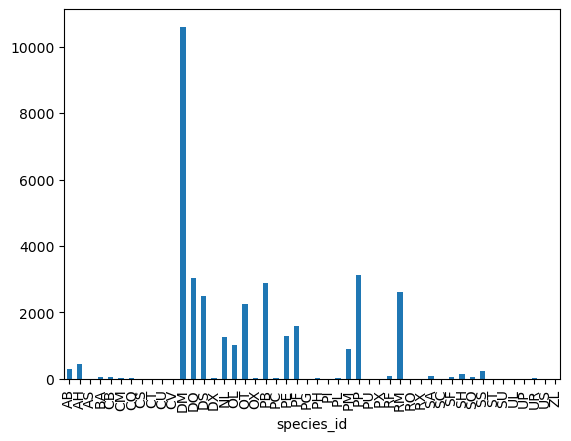

In [48]:
# Plot species_counts
species_counts.plot(kind='bar')

We can also look at how many animals were captured in each site:

<Axes: xlabel='plot_id'>

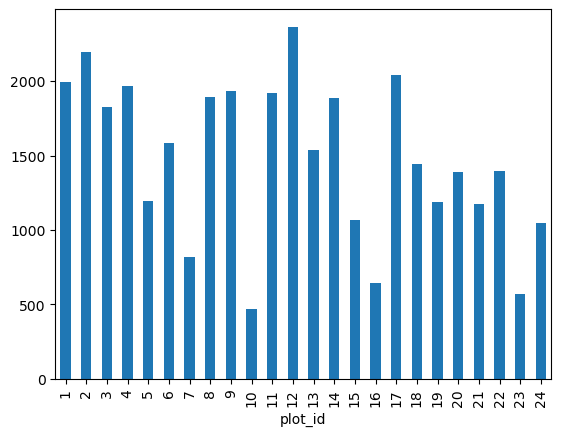

In [49]:
# Create a total_count variable that sums the 'record_id' values for each site
total_count = surveys_df.groupby('plot_id')['record_id'].nunique()

# Now plot it
total_count.plot(kind='bar')


## Quick & Easy Plotting using Plotnine
We can also create plots using the plotnine library.

See [plotnine documentation](https://plotnine.readthedocs.io/en/v0.12.4/) for more examples.

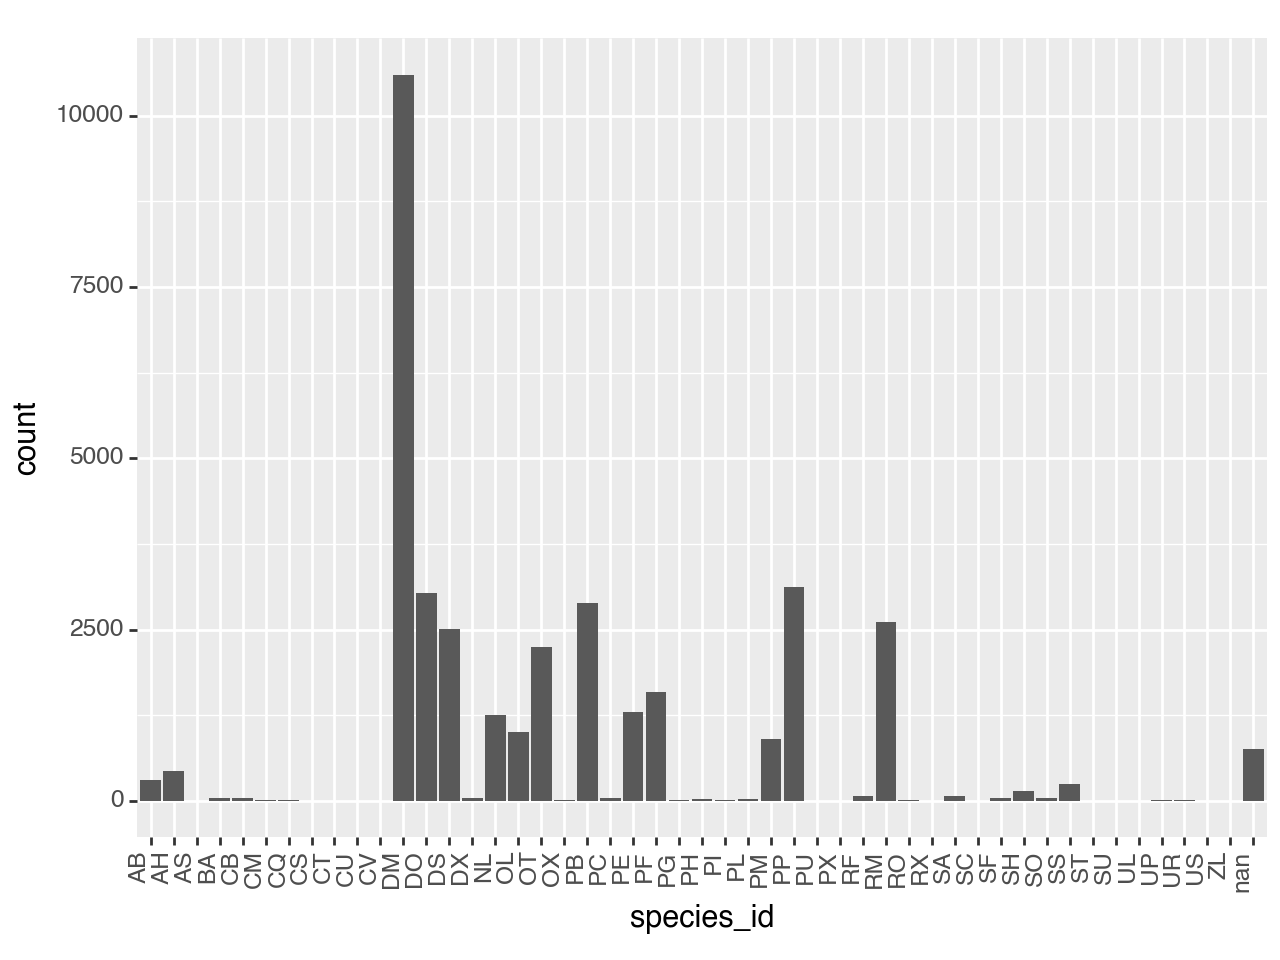

<Figure Size: (640 x 480)>

In [98]:
# Importing plotnine library
import plotnine as p9

# Species Counts using Plotnine
p9.ggplot(data=surveys_df, mapping=p9.aes(x='species_id')) + p9.geom_bar() + p9.theme(axis_text_x=p9.element_text(angle=90, hjust=1))

## Quick & Easy Plotting using Plotly
We can also create plots using the Plotly library.

See [plotly documentation](https://plotly.com/python/plotly-express/) for more examples.

In [91]:
# Importing plotly express library
import plotly.express as px

# Species Counts using Plotly Express
px.bar(data_frame=species_counts, x=species_counts.index, y='record_id', title='Species Counts', labels={'species_id':'Species ID', 'record_id':'Count'})

#### ✏️ Challenge - Plots
These challenge activities involve plotting data. It's often best to store the data to be plotted in a variable first, then call the .plot() method on it

1. Create a plot of average weight across all species per site.
2. Create a plot of total males versus total females for the entire dataset.

<Axes: xlabel='plot_id'>

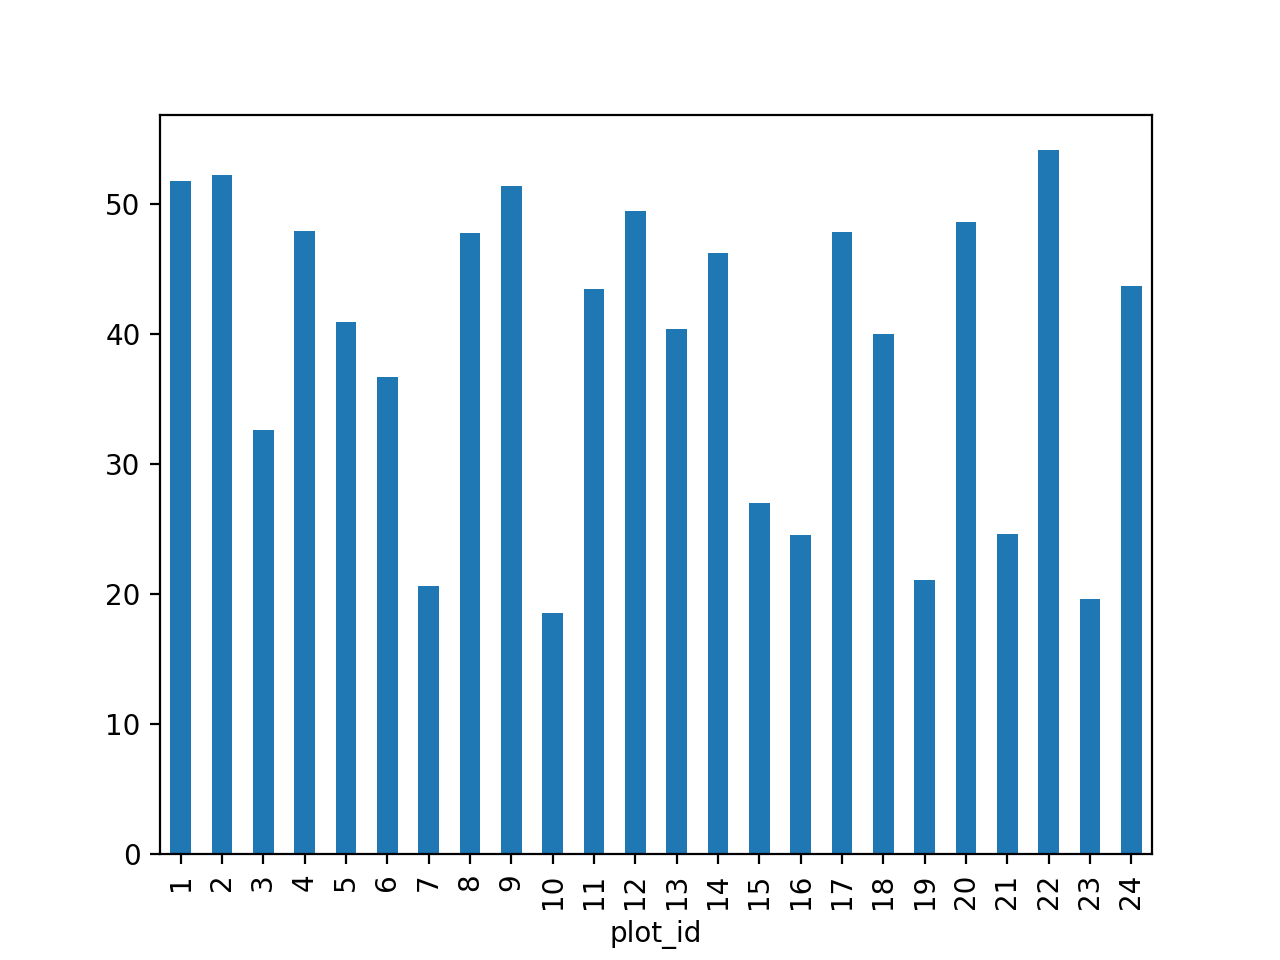

In [99]:
#1 
surveys_df.groupby('plot_id')['weight'].mean().plot(kind='bar')


<Axes: xlabel='sex'>

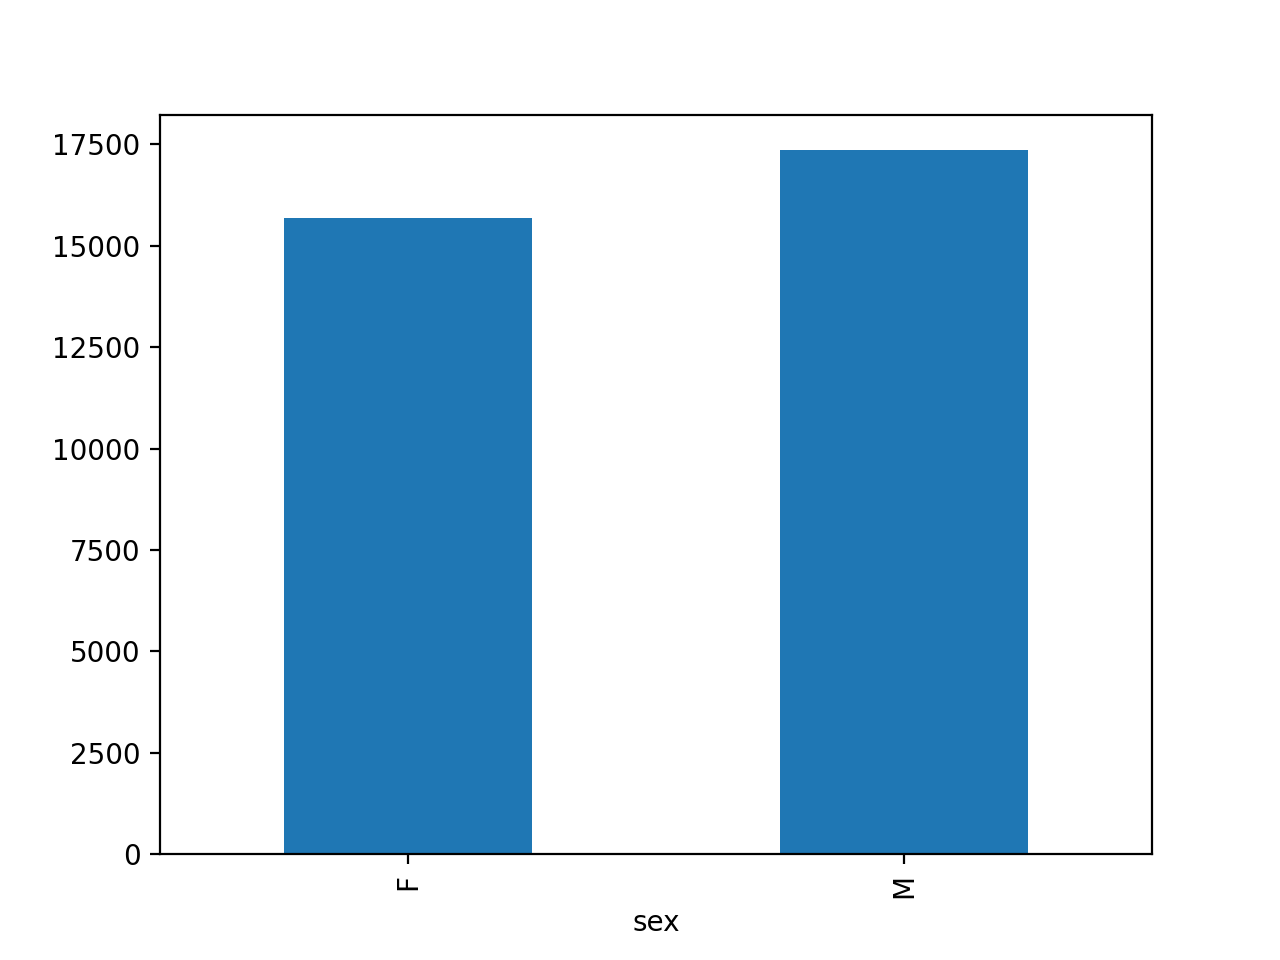

In [100]:
# 2
surveys_df.groupby('sex')['record_id'].count().plot(kind='bar')

---

### 🔥 Summary Plotting Challenge

Create a stacked bar plot, with weight on the Y axis, and the stacked variable being sex. The plot should show total weight by sex for each site. Some tips are below to help you solve this challenge:

- For more information on pandas plots, see [pandas’ documentation page on visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#basic-plotting-plot).  
- You can use the code that follows to create a stacked bar plot but the data to stack need to be in individual columns.   

Here’s a simple example with some data where ‘a’, ‘b’, and ‘c’ are the groups, and ‘one’ and ‘two’ are the subgroups.



In [102]:
# Example plots
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']), 'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
pd.DataFrame(d)

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


<Axes: title={'center': 'The title of my graph'}, xlabel='This is the x axis label', ylabel='This is the y axis label'>

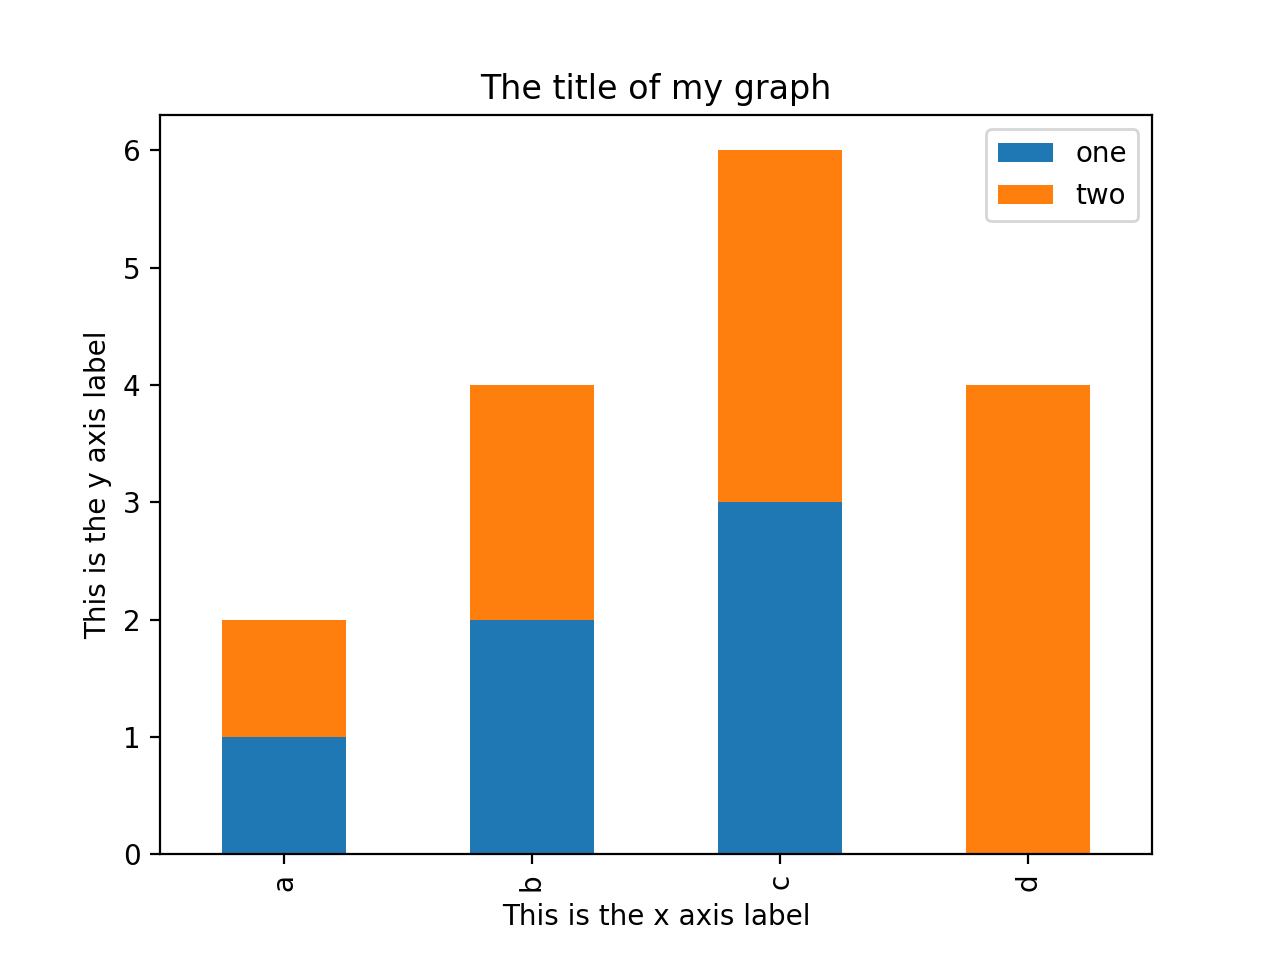

In [103]:
# Plotting 
my_df = pd.DataFrame(d)
my_df.plot(
    kind='bar', stacked=True, title="The title of my graph", 
    xlabel="This is the x axis label", ylabel = "This is the y axis label"
)
# Notice the multi-line expression used above within the `plot` function's brackets.
# When doing this, dont forget your commas!

# If you want to customize your plots further, try running `help(my_df.plot)` 
# to read the docstring for all of possible uses!

You can use the `.unstack()` method to transform grouped data into columns for each plotting. Try running `.unstack()` on some DataFrames above and see what it yields.

In [104]:
# Unstack
my_df.unstack()

one  a    1.0
     b    2.0
     c    3.0
     d    NaN
two  a    1.0
     b    2.0
     c    3.0
     d    4.0
dtype: float64

Start by transforming the grouped data (by site and sex) into an unstacked layout, then create a stacked plot.
Good luck with the challenge!

In [116]:
# Challenge cells
site_sex = surveys_df.groupby(['plot_id', 'sex'])
site_sex_count = site_sex['weight'].sum()

In [120]:
spc = site_sex_count.unstack()

Text(0.5, 0, 'Plot')

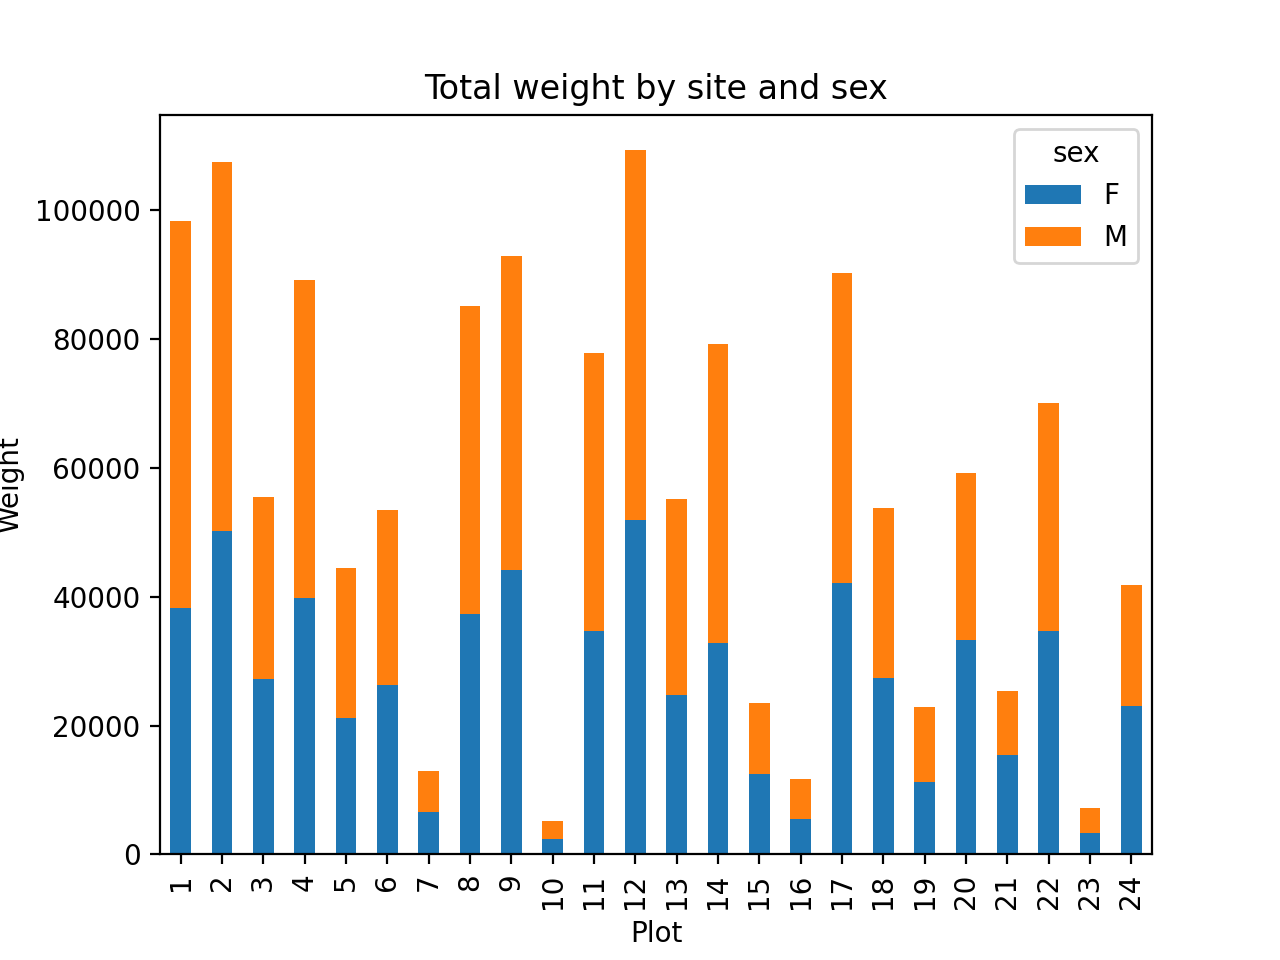

In [121]:
s_plot = spc.plot(kind='bar', stacked=True, title="Total weight by site and sex")
s_plot.set_ylabel("Weight")
s_plot.set_xlabel("Plot")

---

# ❗Key Points
- Libraries enable us to extend the functionality of Python.
- Pandas is a popular library for working with data.
- A Dataframe is a Pandas data structure that allows one to access data by column (name or index) or row.
- Aggregating data using the groupby() function enables you to generate useful summaries of data quickly.
- Plots can be created from DataFrames or subsets of data that have been generated with groupby().